# **PH 431: *Exploration of Electrodynamic Simulations Project*** by Dan Jang

## **Abstract**
Based on concepts explored in *PH 431: Electricity & Magnetism I* and from our textbook, *Introduction to Electrodynamics* by David J. Griffiths [[1]](https://www.cambridge.org/highereducation/books/introduction-to-electrodynamics/3AB220820DBB628E5A43D52C4B011ED4#overview), we created a computational physics project based on *Python* for exploring the simulation of various electrodynamics phenomena, particularly in the modeling and visualization of *electric fields*, *potentials*, and *point charges*.

Our exploration project was primarily based on a deconstructed, piece-by-piece implementation of these electrodynamics' topics in electromagnetism, where a *Python*-based, *Project Jupyter Notebook* [[2]](https://jupyter.org) was used to highlight particular parts & pieces of our project, with specific examples of electromagnetic phenomena and situations.

Our project primarily features the *PyCharge* [[3]](http://arxiv.org/abs/2107.12437) and *PyGame* [[4]](https://www.pygame.org/wiki/about) libraries – as well as the implementation of other libraries and visual or mathematical methods of computational physics.

The goal of our project was to help provide an elementary, or otherwise easy-to-under introduction to electromagnetism, particularly on the 3D representation of electric fields & potentials and moving point charges in those fields and potentials.

## Part 1: ***Initialization & Setup***

In [2]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Initialization of Project Libraries, Constants, & Jupyter Notebook

import pygame as pgame
import numpy as np
#import math
import pycharge as pc
import sys
import matplotlib as mplotlib
import matplotlib.pyplot as plot
import threading
import tkinter as tk
from tkinter import ttk
from matplotlib import animation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from matplotlib.animation import FuncAnimation
from ipywidgets import widgets as wd
from ipywidgets import interactive
from IPython.display import display, HTML


pygame 2.1.2 (SDL 2.0.18, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Part 2: ***Electric Fields***

In [2]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 2 - Electric Field Simulation Demonstration

## Initialize PyGame
pgame.init()

## Dimensional & Physical Constants
w, h = 1000, 1000
q_radius = 10
K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)

## Color Constants
black_color = (47, 47, 56)
white_color = (255, 255, 255)
red_color = (255, 62, 62)
blue_color = (62, 62, 255)

## Defining point charges as a class
class PointCharge:
    
    def __init__(self, position, charge):
        
        self.position = position
        self.charge = charge
    
    def point(self, screen):
        
        color = red_color if self.charge > 0 else blue_color
        pgame.draw.circle(screen, color, self.position, q_radius)
        
## Electric field function for calculating the electric field line vectors at a given point charge due to its charge
def e_field(point_charge, point):
    
    q = point_charge.charge
    r_vector = np.array(point) - np.array(point_charge.position)
    r_magnitude = np.linalg.norm(r_vector)
    
    if r_magnitude == 0:
        return np.array([0, 0])
    
    r_carot = (r_vector / r_magnitude)
    e_vector = (K * q / r_magnitude ** 2) * r_carot
    
    return e_vector

## Initialize the PyGame Demo Window for Part 2: Electric Field Simulation
efield_demo = pgame.display.set_mode((w, h))
pgame.display.set_caption("PH 431: Part 2 - Electric Field Simulation")

## Main Function for Part 2: Electric Field Simulation
pointcharges = []
state = True

while state:
    efield_demo.fill(white_color)
    
    # Main simulation loop for event-handling
    for event in pgame.event.get():
        if event.type == pgame.QUIT:
            state = False
            
        # If the user presses either the left or right mouse buttonz
        elif event.type == pgame.MOUSEBUTTONDOWN:
            position = pgame.mouse.get_pos()
            
            # Left-click, add positive point charge
            if event.button == 1:
                pointcharges.append(PointCharge(position, 1e-9))
                
            # Right-click, add negative point charge
            elif event.button == 3:
                pointcharges.append(PointCharge(position, -1e-9))
            
    # Loop for drawing the point charges
    for p in pointcharges:
        p.point(efield_demo)
        
    # Calculating & drawing out the electric field line-vectors
    for y in range(0, h, 20):
        for x in range(0, w, 20):
            total_e = np.array([0.0, 0.0])
            
            for c in pointcharges:
                total_e += e_field(c, (x, y))
            
            e_magnitude = np.linalg.norm(total_e)
            if e_magnitude > 0:
                e_direction = total_e / e_magnitude
                e_position = (x + int(e_direction[0] * 10), y + int(e_direction[1] * 10))
                pgame.draw.line(efield_demo, black_color, (x, y), e_position)
    
    # After drawing the electric field line-vectors, update the display
    pgame.display.flip()

# End simulation
pgame.quit()


## Part 3: ***Electric Potentials***

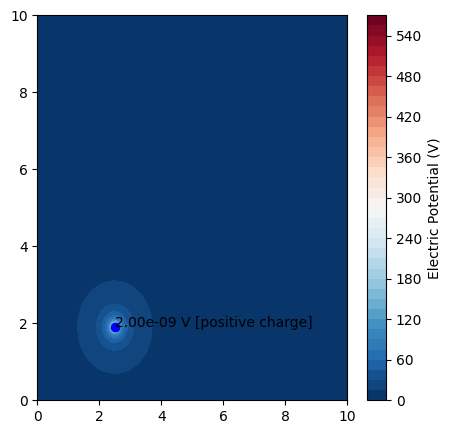

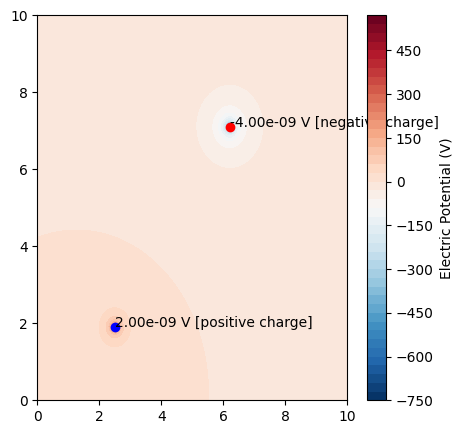

In [13]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 3 - Electric Potentials

## Physical Constants & Arrays
K = 8.99e9 #N * m^2 / C^2 (Coulomb's Constant)
pointcharges = []
positions = []

## Widgets for user-input of point charges' positions & charge-values
charge_val = wd.FloatText(value=1e-9, description='Charge Value (C):', step=1e-9)

charge_xpos = wd.FloatSlider(min=0, max=10, step=0.1, description='X-position')
charge_ypos = wd.FloatSlider(min=0, max=10, step=0.1, description='Y-position')

new_pointcharge_button = wd.Button(description='Add le Point Charge')
reset_pointcharges_button = wd.Button(description='Reset')

output = wd.Output()

### Helper Functions for Widgets
## Function for a new point charge
def new_pcharge(_):
    
    with output:
        if len(pointcharges) < 2:
            pcharge = charge_val.value
            position = (charge_xpos.value, charge_ypos.value)
            pointcharges.append(pcharge)
            positions.append(position)
            refresh()
            
        else:
            print("Whoopsie, looks like there are already two point charges placed - please click reset to add new point charges!")

## Function for resetting the point charges
def reset_pcharges(_):
    
    global pointcharges, positions
    
    with output:
        pointcharges = []
        positions = []
        
        refresh()

## Refreshing function for the displayed plot
def refresh():
    
    output.clear_output(wait=True)
    figure, ax = plot.subplots(figsize=(5, 5))
    
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    V = np.zeros_like(X)
    
    for pc, p in zip(pointcharges, positions):
        r = np.sqrt((X - p[0]) ** 2 + (Y - p[1]) ** 2)
        V += K * pc / r
        
    fieldmap = ax.contourf(X, Y, V, levels=50, cmap='RdBu_r')
    plot.colorbar(fieldmap, ax=ax, label='Electric Potential (V)')
    
    for pc, p in zip(pointcharges, positions):
        ax.plot(p[0], p[1], 'bo' if pc > 0 else 'ro')
        #pcharge_txt = f'{pc:.2e} V'
        if pc > 0:
            ax.text(p[0], p[1], f'{pc:.2e} V [positive charge]', color='black')
        else:
            ax.text(p[0], p[1], f'{pc:.2e} V [negative charge]', color='black')
    
    with output:
        display(figure)

## Widget button mapping
new_pointcharge_button.on_click(new_pcharge)
reset_pointcharges_button.on_click(reset_pcharges)

## Display le widgetz
wd.VBox([wd.HBox([charge_val, charge_xpos, charge_ypos]),
         wd.HBox([new_pointcharge_button, reset_pointcharges_button]),
         output])


## Part 4: ***Point Charges***

FloatSlider(value=2e-09, description='Amplitude (m):', max=5e-09, min=1e-09, step=1e-10)

FloatSlider(value=7.49e+16, description='Omega (rad/s):', max=1e+17, min=1e+16, step=1000000000000000.0)

FloatSlider(value=1e-19, description='Charge (C):', max=1e-18, min=1e-20, step=1e-20)

Button(description='Create Animation', style=ButtonStyle())

NameError: name 'mpl' is not defined

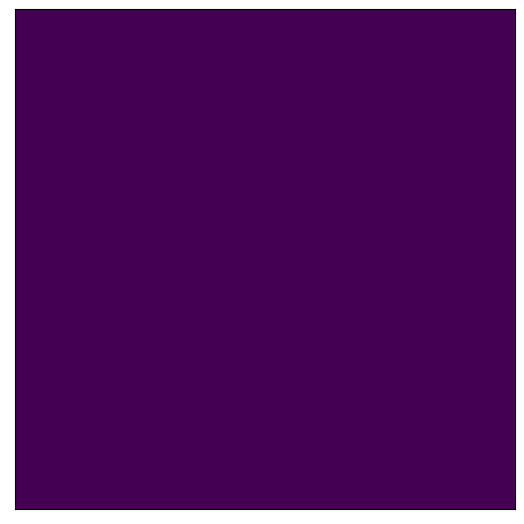

In [2]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 4 - Point Charges



## Part 5: ***Full GUI-Encapsulated Project Program***

In [ ]:
##### PH 431: Exploration of Electrodynamic Simulations Project by Dan J.
#### Part 5 - Full GUI Project-Program


## References

1.	Griffiths DJ. Introduction to electrodynamics. 4 ed. Cambridge: Cambridge university press; 2017.
2.	Project Jupyter [Internet]. Available from: https://jupyter.org.
3.	Filipovich MJ, Hughes S. PyCharge: An open-source Python package for self-consistent electrodynamics simulations of Lo-rentz oscillators and moving point charges. Computer Physics Communications [Internet]. 2022 May; 274:108291. Available from: http://arxiv.org/abs/2107.12437.
4.	About - PyGame wiki [Internet]. Available from: https://www.pygame.org/wiki/about.
5.	Mitolo M, Araneo R. A Brief History of Electromagnetism [History]. IEEE Industry Applications Magazine [Internet]. 2019 Mar; 25(2):7–11. Available from: https://ieeexplore.ieee.org/abstract/document/8638875?casa_token=wNzBgMvG80kAAAAA:vcw_uNHEJVPtTypA1gnxE21Lerm3muFOhgjIHRTaUuwB8d0LQEQDHm_0AsI0aVrBM-HI6F2V4w.
6.	Chen Z, Wang CF, Hoefer WJR. A Unified View of Computational Electromagnetics. IEEE Transactions on Microwave Theory and Techniques [Internet]. 2022 Feb; 70(2):955–69. Available from: https://ieeexplore.ieee.org/abstract/document/9682427.
7.	Physics LibreTexts [Internet]. 2016. 5.4: Coulomb’s Law. Available from: https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_II_-_Thermodynamics_Electricity_and_Magnetism_(OpenStax)/05%3A_Electric_Charges_and_Fields/5.04%3A_Coulomb's_Law.
8.	Quantum Particle Golf [Internet]. 2011 July 26. Available from: https://www.pygame.org/project/1949.
9.	Python documentation [Internet]. tkinter — Python interface to Tcl/Tk. Available from: https://docs.python.org/3/library/tkinter.html.
10.	Team JD. ipywidgets: Jupyter interactive widgets [Internet]. Available from: http://jupyter.org.
11.	Jupyter and the future of IPython — IPython [Internet]. Available from: https://ipython.org.

## Credits
Special thanks to *GitHub Copilot* and *GPT* for assistance with code implementation & troubleshooting.
